In [617]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [618]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [619]:
#reading the data
loan_df = pd.read_csv("loan.csv")

In [620]:
# exploring the data
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [621]:
# shape of the dataframe
print('Shape:',loan_df.shape)
# loan info
print('loan info:',loan_df.info())
# Number of duplicates
print('Number of duplicates:',loan_df.duplicated().sum())

Shape: (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
loan info: None
Number of duplicates: 0


In [623]:
# check for null columns
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [624]:
# drop all the columns that are null
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-Jun,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [625]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [626]:
# from the above list we find few columns have more null values removing them
loan_df = loan_df.drop(["next_pymnt_d"], axis=1)

In [627]:
loan_df = loan_df.drop(["mths_since_last_record"], axis=1)

In [628]:
## Checking for missing values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [629]:
# Checking column with large amount of null values(in percentage)
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [630]:
# drop columns with more than 50% null
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<50]
loan_df.shape

(39717, 54)

In [631]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_df=loan_df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','open_acc','revol_bal','pub_rec','inq_last_6mths','installment','delinq_2yrs','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)


In [632]:
# Removing desc,emp_title,desc, url as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_df=loan_df.drop(['emp_title','desc','url'],axis=1)


In [633]:
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_df=loan_df.drop(['zip_code'],axis=1)


In [634]:
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_df=loan_df.drop(['member_id'],axis=1)


In [635]:
# Removing revol_util as it is not required for the analysis
loan_df=loan_df.drop(['revol_util'],axis=1)

In [636]:
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 29)


In [637]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_df.nunique().sort_values(ascending=True))

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
verification_status               3
loan_status                       3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
total_acc                        82
int_rate                        371
earliest_cr_line                526
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
title                       

In [638]:
# Removing irrelevant columns which contain 1 unique value
loan_df = loan_df.loc[:,loan_df.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 21)


In [639]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
title                     11
verification_status        0
total_acc                  0
earliest_cr_line           0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
id                         0
loan_amnt                  0
home_ownership             0
sub_grade                  0
grade                      0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
annual_inc                 0
dtype: int64


In [640]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_df.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [641]:
# Removing null values in emp_length columns
loan_df = loan_df.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_df.shape)

(38642, 21)


In [642]:
# checking pub_rec_bankruptcies for value counts
print(loan_df.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64


In [643]:
# check the median for pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.describe()

count    37945.000000
mean         0.041560
std          0.200507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [644]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [645]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

title                   10
id                       0
verification_status      0
total_acc                0
earliest_cr_line         0
dti                      0
addr_state               0
purpose                  0
loan_status              0
issue_d                  0
annual_inc               0
loan_amnt                0
home_ownership           0
emp_length               0
sub_grade                0
grade                    0
int_rate                 0
term                     0
funded_amnt_inv          0
funded_amnt              0
pub_rec_bankruptcies     0
dtype: int64


In [646]:
# check the length of title
len(loan_df['title'].value_counts())

19147

In [647]:
# explore the column title
loan_df['title'].head(20)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
Name: title, dtype: object

In [648]:
#since title column has too many unique values... let us drop this column as it may not be useful to keep it
loan_df.drop(columns=['title'], inplace=True)

In [649]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

id                      0
loan_amnt               0
total_acc               0
earliest_cr_line        0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
int_rate                0
term                    0
funded_amnt_inv         0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


In [650]:
# Removing duplicate rows in the dataframe
loan_df = loan_df.drop_duplicates()

In [651]:
# Checking for missing values across the rows
print((loan_df.isnull().sum(axis=1)).max())

0


In [652]:
loan_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,total_acc,pub_rec_bankruptcies
count,3.864200e+04,38642.000000,38642.000000,38642.000000,3.864200e+04,38642.000000,38642.000000,38642.000000
mean,6.810404e+05,11291.615988,11017.101211,10455.452667,6.960828e+04,13.325108,22.122121,0.040811
std,2.113045e+05,7462.136215,7193.038828,7139.613641,6.425320e+04,6.666902,11.392943,0.198767
min,5.473400e+04,500.000000,500.000000,0.000000,4.000000e+03,0.000000,2.000000,0.000000
25%,5.134350e+05,5500.000000,5500.000000,5000.000000,4.140000e+04,8.200000,14.000000,0.000000
50%,6.627705e+05,10000.000000,9950.000000,9000.000000,6.000000e+04,13.415000,20.000000,0.000000
75%,8.364912e+05,15000.000000,15000.000000,14425.000000,8.319999e+04,18.590000,29.000000,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,6.000000e+06,29.990000,90.000000,2.000000


In [653]:
# data preparation
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [654]:
# Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]
loan_df.shape

(37544, 20)

In [655]:
# Correcting data type and format for columns in the dataframe

In [656]:

## Deriving more columns with the conversion of data type
loan_df.term=loan_df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

In [657]:
loan_df['term'].value_counts()

term
36    28287
60     9257
Name: count, dtype: int64

In [658]:
# correcting int_rate column
loan_df.int_rate=loan_df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [659]:
# checking dataframe info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   funded_amnt_inv       37544 non-null  float64
 4   term                  37544 non-null  int32  
 5   int_rate              37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  object 
 14  purpose               37544 non-null  object 
 15  addr_state            37

In [660]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [661]:
# correcting emp_length column and converting it to float
loan_df.emp_length=loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

In [662]:
loan_df.emp_length.value_counts()

emp_length
10.0    8488
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [663]:
## Extracting month and year fromt he column issue_d
df_month_year = loan_df['issue_d'].str.partition("-", True)

In [664]:
df_month_year.head()

,0,1,2
0,11,-,Dec
1,11,-,Dec
2,11,-,Dec
3,11,-,Dec
5,11,-,Dec


In [665]:
loan_df['issue_month']=df_month_year[2] 

In [666]:
loan_df['issue_year'] = df_month_year[0].apply(lambda x: '20'+x if len(x)==2 else '200'+x)

In [667]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10.0,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,Jan-85,9,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,C,C4,0.5,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,Apr-99,4,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,1-Nov,10,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,Feb-96,37,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,4-Nov,12,0.0,Dec,2011


In [668]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   funded_amnt_inv       37544 non-null  float64
 4   term                  37544 non-null  int32  
 5   int_rate              37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  float64
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  object 
 14  purpose               37544 non-null  object 
 15  addr_state            37

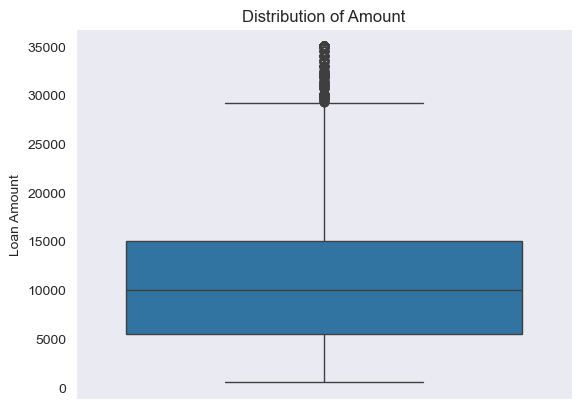

In [669]:
# checking outliers for loan_amnt column
sns.boxplot(loan_df.loan_amnt)
plt.ylabel('Loan Amount')
plt.title('Distribution of Amount',fontsize=12)
plt.show()

In [670]:
# remove outliers less than or equal to 30K

In [671]:
loan_df = loan_df[loan_df['loan_amnt'] <=30000]

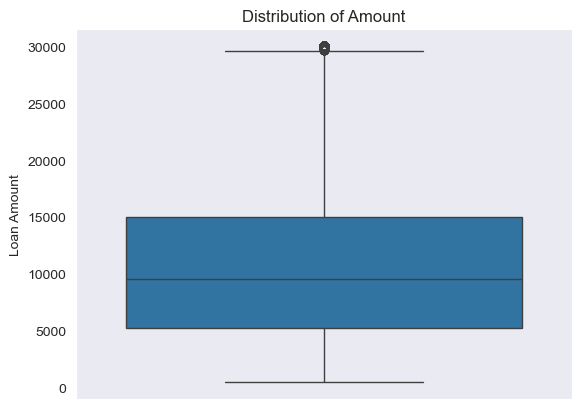

In [672]:
# checking after removal of outliers for loan_amnt column
sns.boxplot(loan_df.loan_amnt)
plt.ylabel('Loan Amount')
plt.title('Distribution of Amount',fontsize=12)
plt.show()

In [673]:
# loan_amnt looks good now after removal of outliers

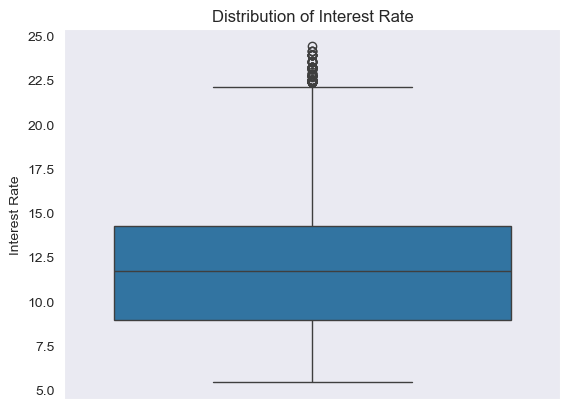

In [674]:
## Analyse int_rate
sns.boxplot(loan_df.int_rate)
plt.ylabel('Interest Rate')
plt.title('Distribution of Interest Rate',fontsize=12)
plt.show()


In [519]:
# Upper fence turns out to be 22.11 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

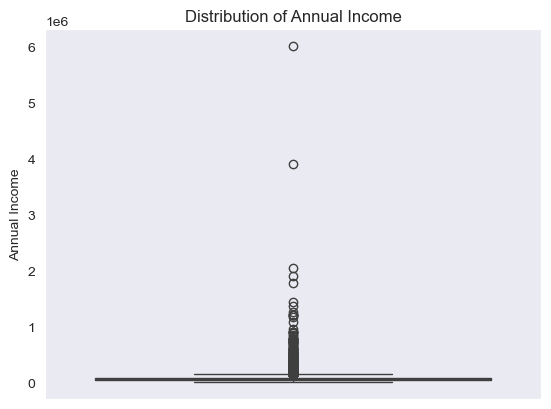

In [675]:
## starting analysis with annual_inc
#px.box(loan_df,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()
sns.boxplot(loan_df.annual_inc)
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()


In [676]:
## Upper fence turns out to be 141k whereas max is 6000k which is too much from upper fence thus we will remove the outliers in column annual_inc.

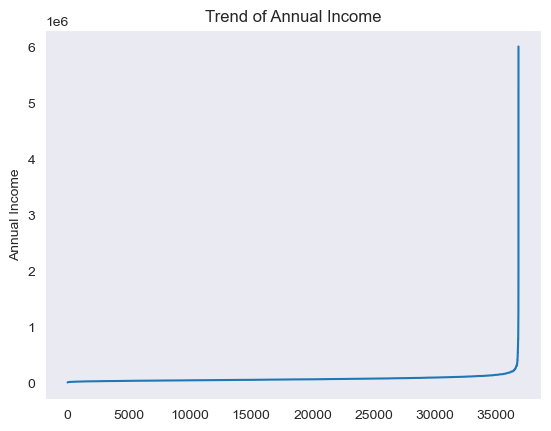

In [677]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
#px.line(sorted(loan_df.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

sns.lineplot(sorted(loan_df.annual_inc))
plt.ylabel('Annual Income')
plt.title('Trend of Annual Income',fontsize=12)
plt.show()


In [678]:
# As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [679]:
## Removing outliers in annual_inc greater than 99th percentile
loan_df = loan_df[loan_df.annual_inc<=np.percentile(loan_df.annual_inc,99)]

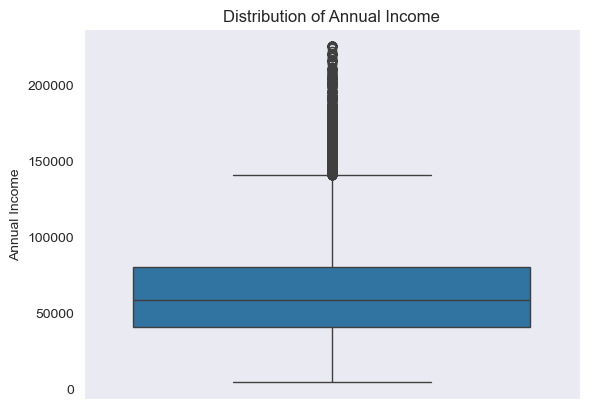

In [680]:
#px.box(loan_df,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()
sns.boxplot(loan_df.annual_inc)
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

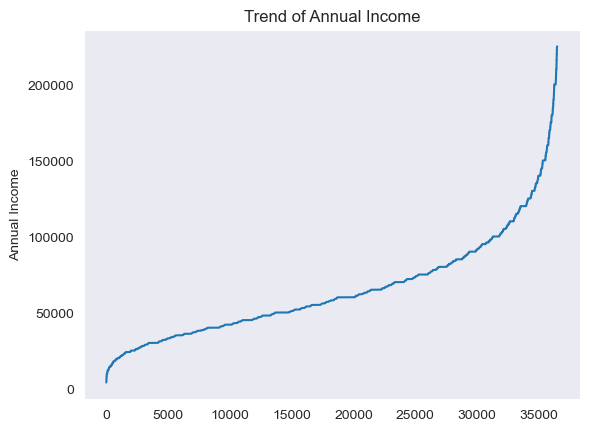

In [681]:
#px.line(sorted(loan_df.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()
sns.lineplot(sorted(loan_df.annual_inc))
plt.ylabel('Annual Income')
plt.title('Trend of Annual Income',fontsize=12)
plt.show()

In [682]:
#  now the trend is more compatible with the analysis

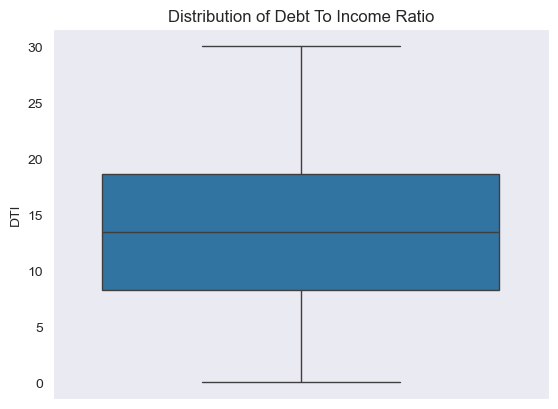

In [683]:
# starting analysis with dti
#px.box(loan_df,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
sns.boxplot(loan_df.dti)
plt.ylabel('DTI')
plt.title('Distribution of Debt To Income Ratio',fontsize=12)
plt.show()


In [684]:
## There are no outliers in dti hence we can move ahead with analysis.

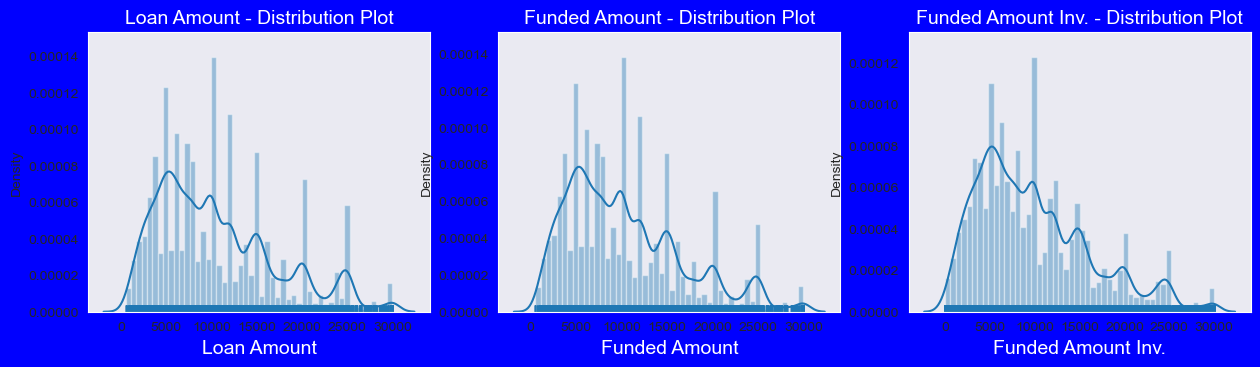

In [685]:
# Lets see distribution of three loan amount fields using distribution plot.

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()



In [686]:
# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

In [687]:
# The data has been cleaned and outliers removed, we can move ahead with the analysis.

In [688]:
# Univariate analysis

loan_status
Fully Paid     85.778119
Charged Off    14.221881
Name: count, dtype: float64


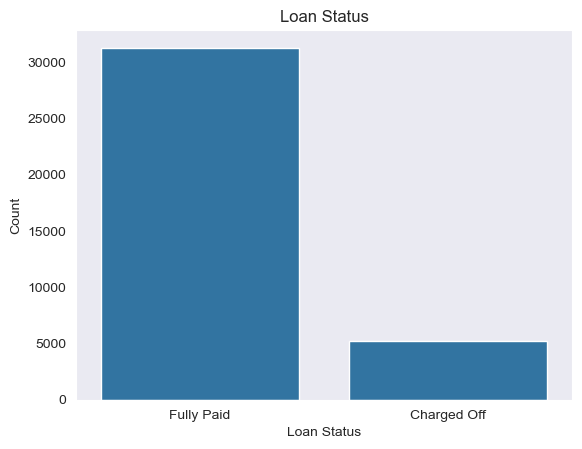

In [689]:
# Loan status 
print(loan_df.loan_status.value_counts()*100/loan_df.loan_status.count())
ax = sns.countplot(x = 'loan_status', data = loan_df)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

In [690]:
# Inference: Defaulted loan are low in numbers compared to Fully Paid.

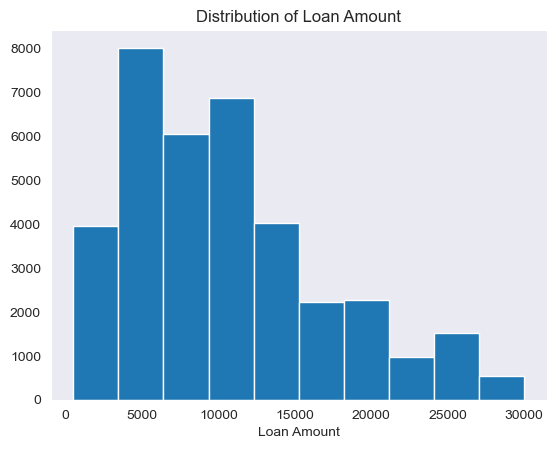

In [691]:
# Loan Amount
#Plotting histogram of loan amount
plt.hist(x=loan_df["loan_amnt"], bins = 10)
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount')
plt.show()

In [692]:
loan_df.loan_amnt.describe()

count    36479.000000
mean     10605.464103
std       6606.902881
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

In [693]:
# Inference: The loan amount varies from 500 to 30000 with a mean of 10605.


In [694]:
# starting analysis of Term of loan 
print(loan_df.term.value_counts()*100/loan_df.term.count())

term
36    76.29321
60    23.70679
Name: count, dtype: float64


In [695]:
loan_df.term.value_counts()

term
36    27831
60     8648
Name: count, dtype: int64

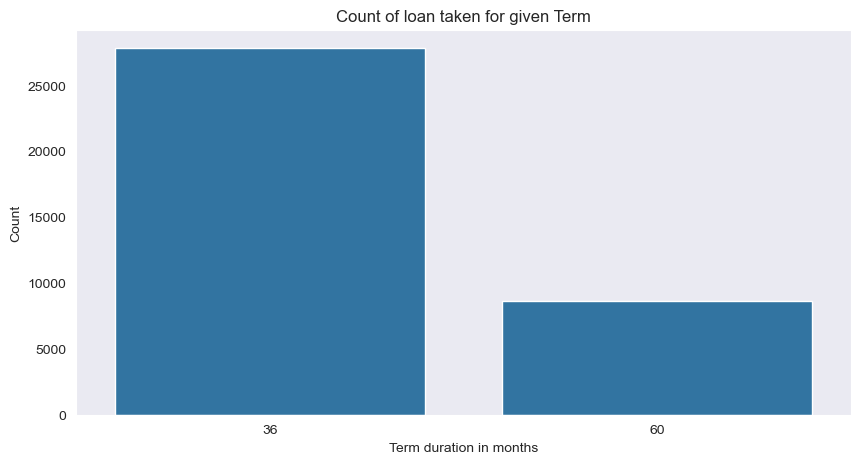

In [696]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x = 'term', data = loan_df)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()


In [697]:
# Inference: More than half of the loan taken has term of 36 months compared to 60 months.

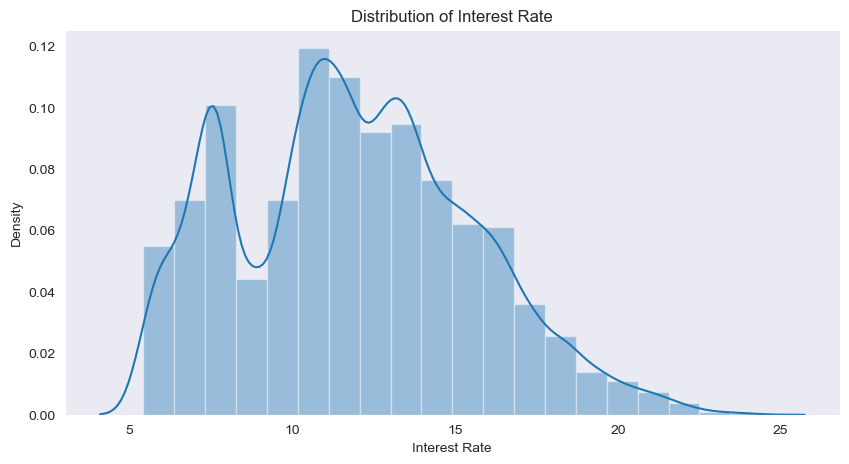

In [698]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(loan_df.int_rate,kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

In [699]:
# Inference: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

In [700]:
loan_df = loan_df.sort_values('grade')

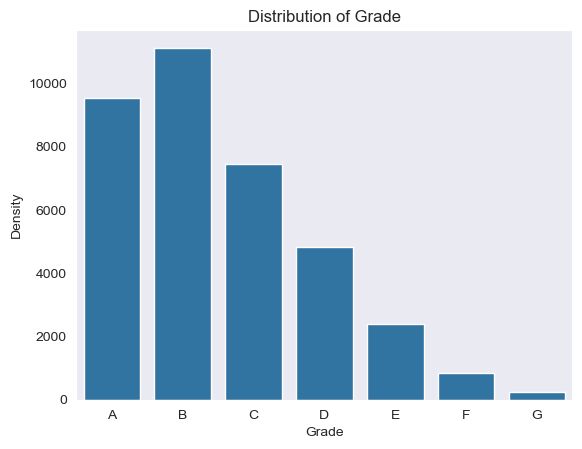

In [701]:
# Distribution of Grade
sns.countplot(x = 'grade', data = loan_df)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

In [702]:
# Inference: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

In [703]:
loan_df = loan_df.sort_values('sub_grade')

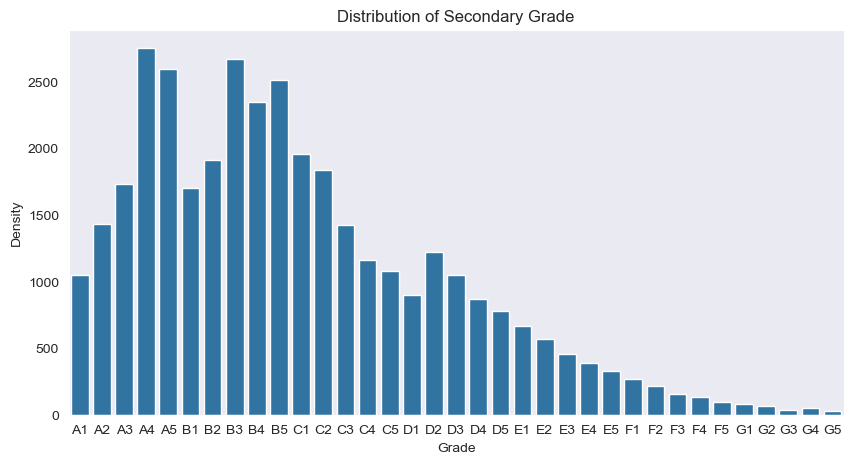

In [704]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'sub_grade', data = loan_df)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

In [705]:
# Inference: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

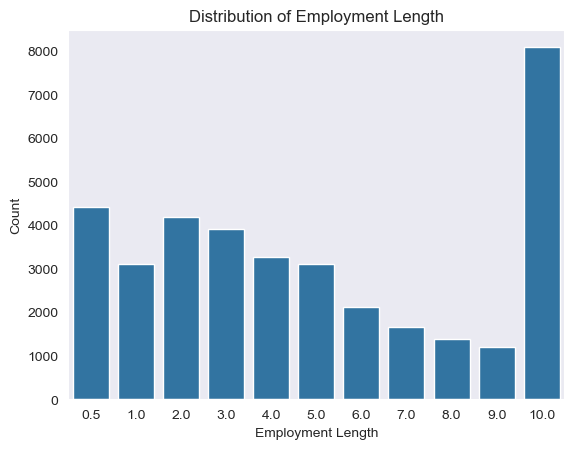

In [706]:
# Distribution of emp_length
sns.countplot(x = 'emp_length', data = loan_df)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

In [707]:
# Inference: Majority of borrowsers have working experience greater than 10 years.

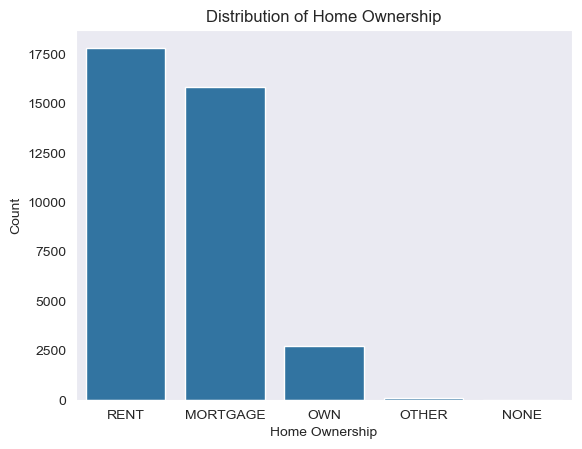

In [708]:
# Distribution of home_ownership
sns.countplot(x = 'home_ownership', data = loan_df)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

In [709]:
#Inference: Majority of borrowsers don't posses property and are on mortage or rent.

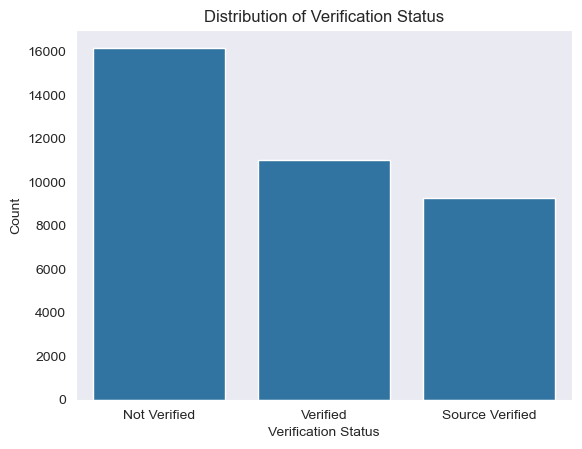

In [710]:
# Distribution of verification_status
sns.countplot(x = 'verification_status', data = loan_df)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

In [711]:
# Inference: About 50% of the borrowers are verified by the company or have source verified.

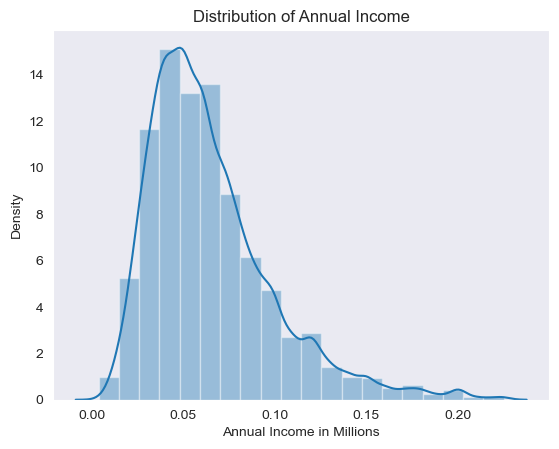

In [712]:
# Distribution of annual_inc
sns.distplot(loan_df.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

In [713]:
# Inference: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

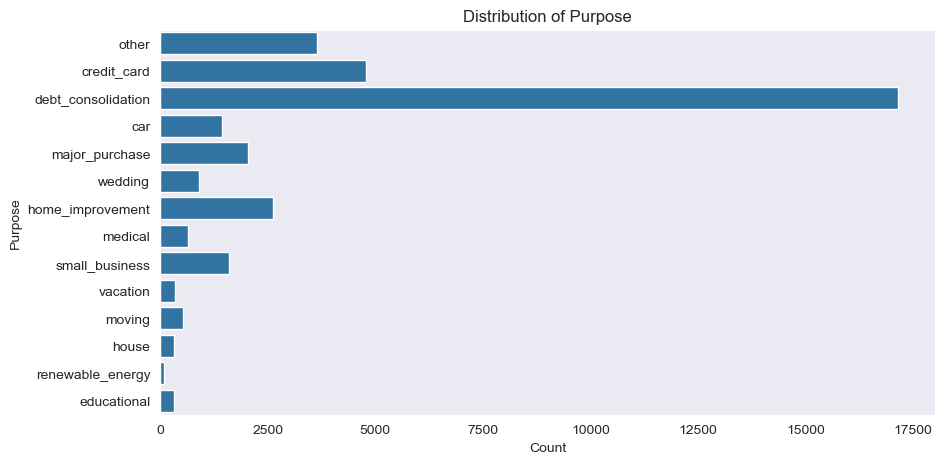

In [714]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y = 'purpose', data = loan_df)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

In [715]:
# Inference: A large percentage of loans are taken for debt consolidation followed by credit card.

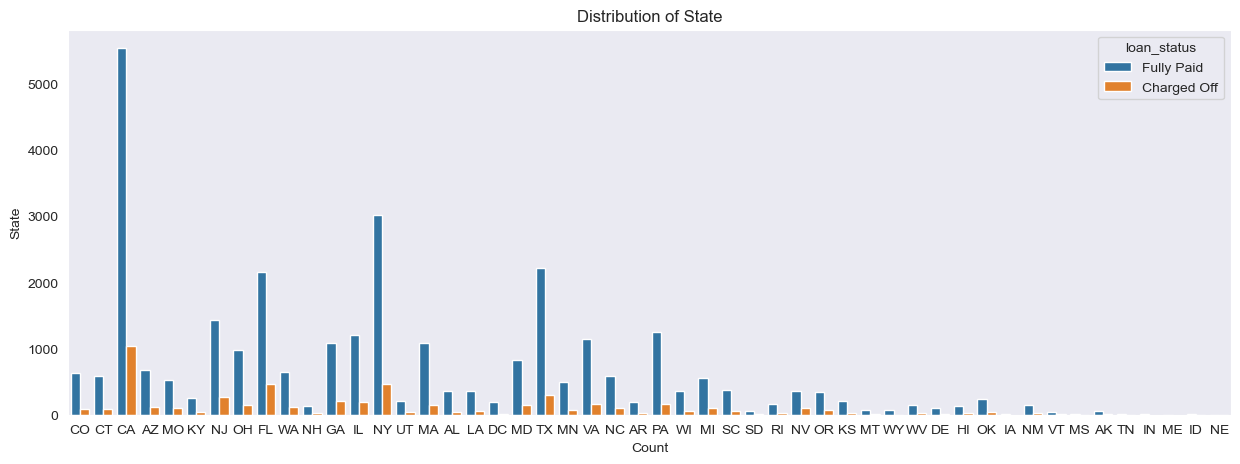

In [716]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(x = 'addr_state', data = loan_df, hue ='loan_status')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

In [717]:
#Inference: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

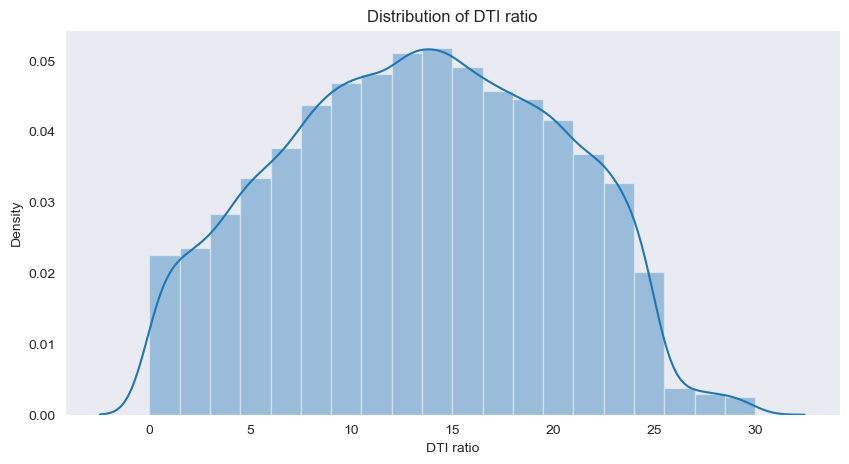

In [718]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

In [719]:
# Inference: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

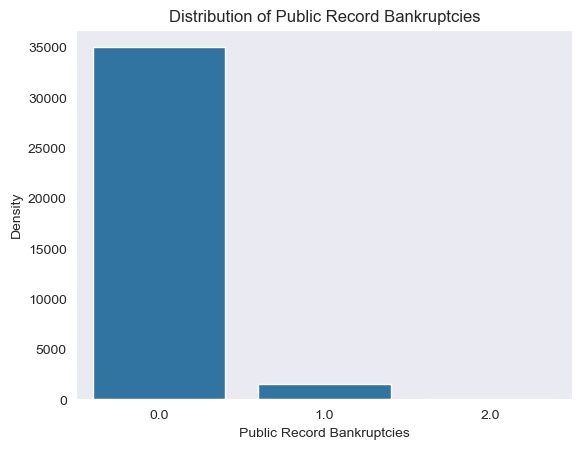

In [720]:
# Distribution of pub_rec_bankruptcies
sns.countplot(x = 'pub_rec_bankruptcies', data = loan_df)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

In [721]:
# Inference: Majority of the borrowers have no record of Public Recorded Bankruptcy.

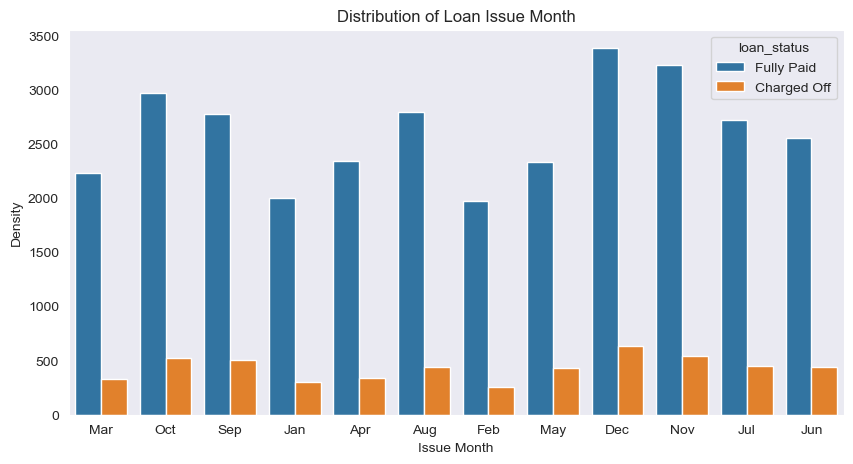

In [722]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x = 'issue_month', data = loan_df, hue ='loan_status')
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

In [723]:
loan_df.issue_month.value_counts()

issue_month
Dec    4014
Nov    3770
Oct    3492
Sep    3276
Aug    3231
Jul    3166
Jun    2993
May    2766
Apr    2682
Mar    2555
Jan    2302
Feb    2232
Name: count, dtype: int64

In [724]:
# Inference: Majority of the loans are given in last quarter of the year.

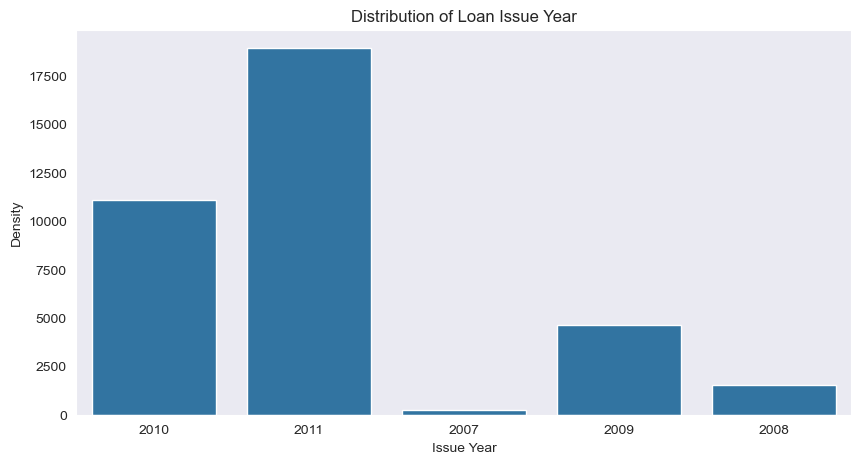

In [725]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(x = 'issue_year', data = loan_df)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

In [726]:
# Inference: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

In [727]:
# Segmented Univariate Analysis

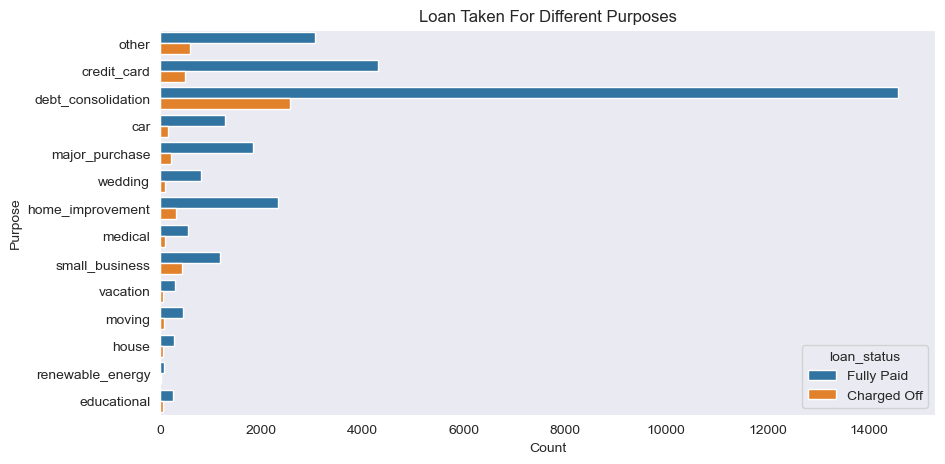

In [728]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

In [729]:
# Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

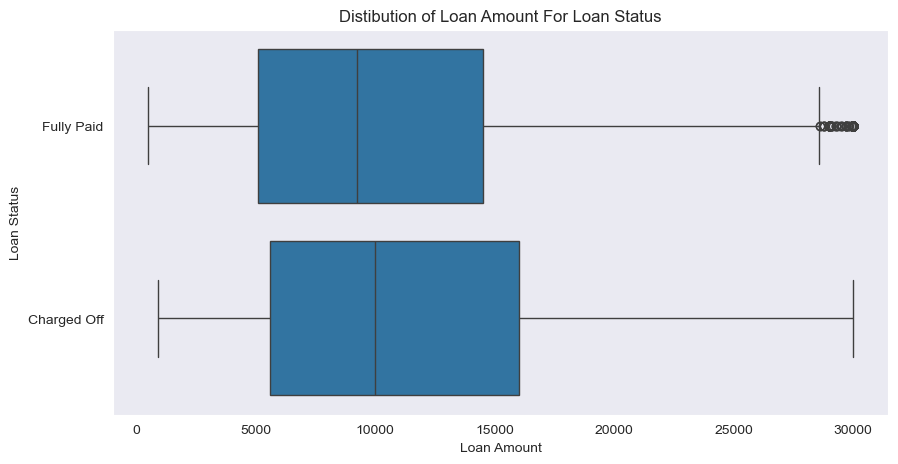

In [730]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

In [731]:
# Inference: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

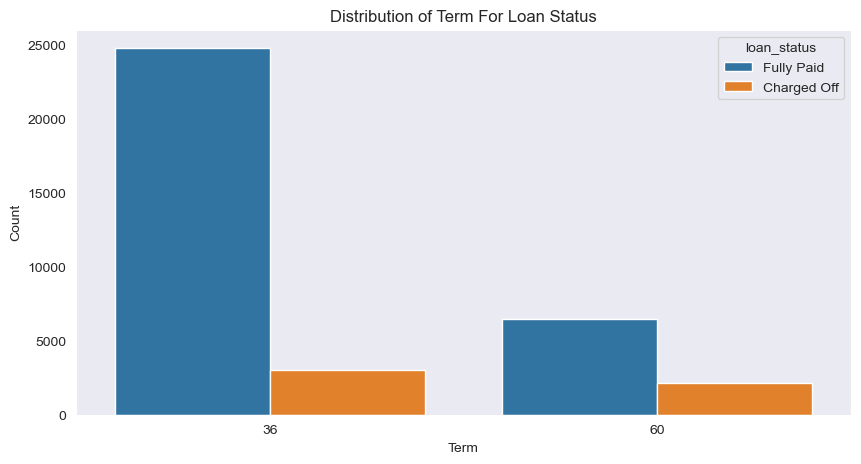

In [732]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

In [733]:
# Inference: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

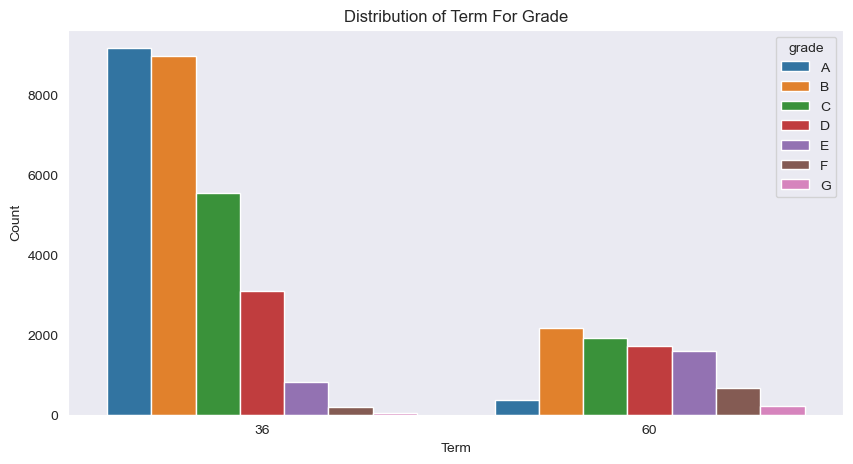

In [734]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

In [735]:
# Inference: The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

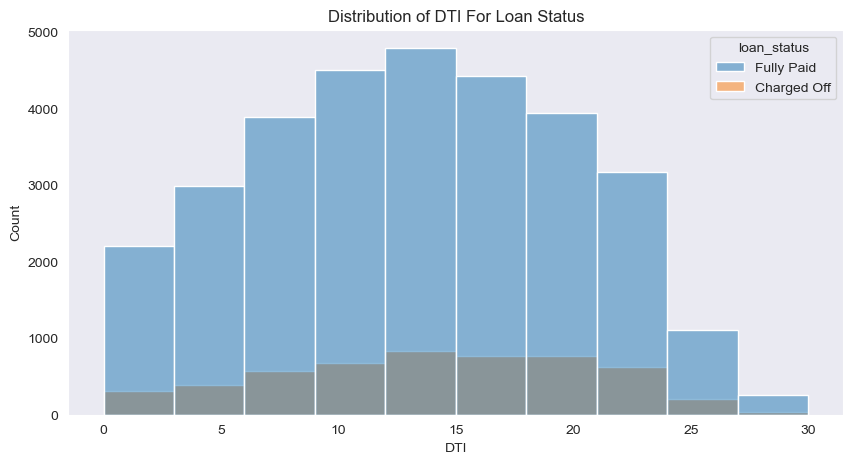

In [736]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

In [737]:
# Inference: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

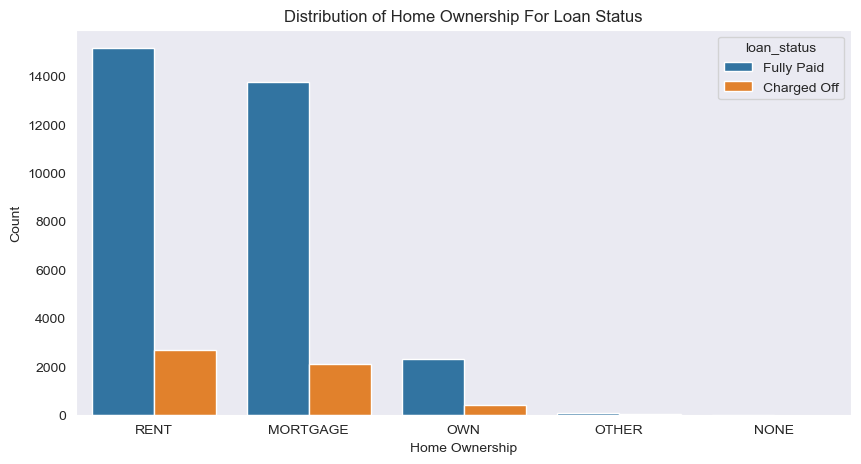

In [738]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.show()

In [739]:
# Inference: The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

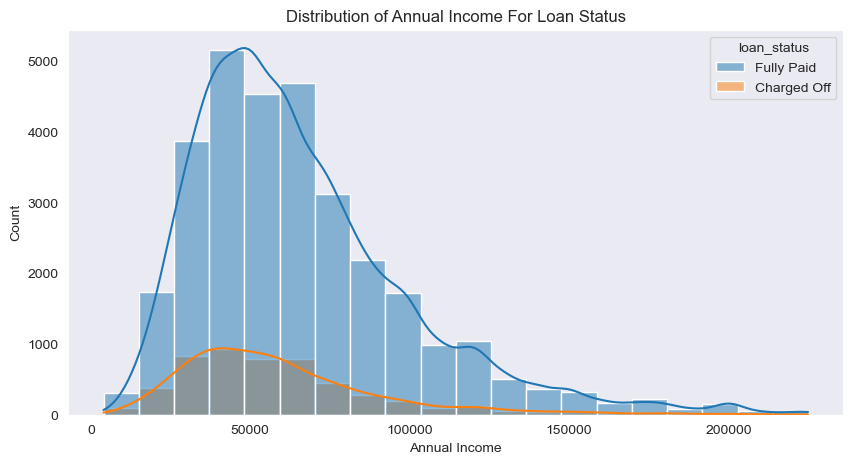

In [740]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

In [741]:
# Inference: Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

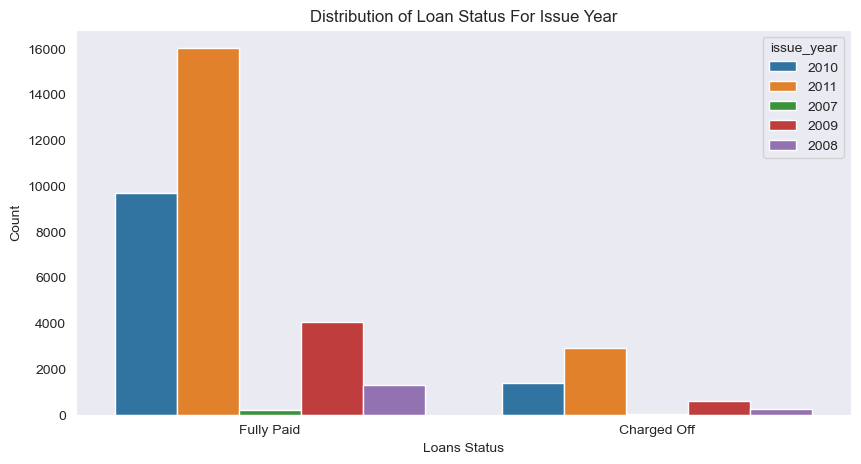

In [742]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

In [743]:
#Inference: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

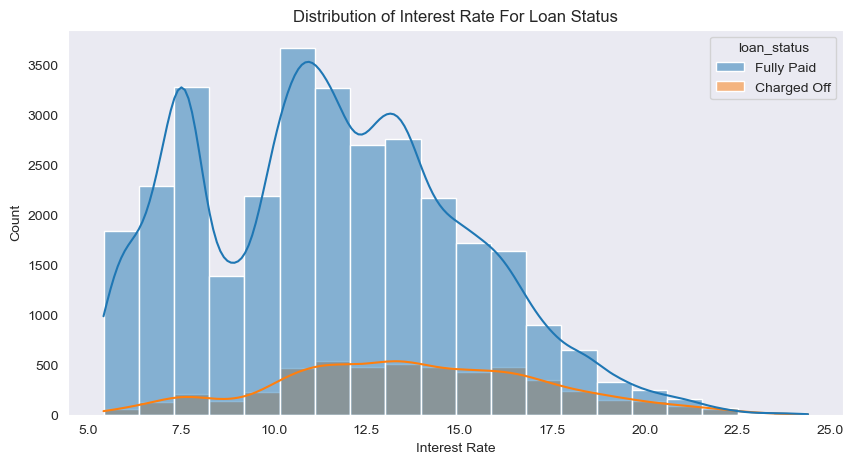

In [744]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

In [745]:
# Inference: The default loan amount increases with interest rate and also shows decline after 17.5 % interest rate.

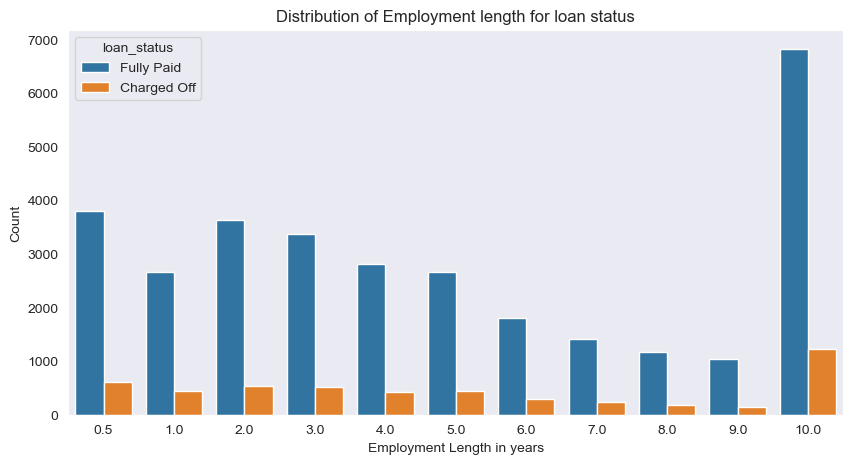

In [746]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment length for loan status',fontsize=12)
plt.show()

In [747]:
# Inference: The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

In [748]:
# Bivariate Analysis

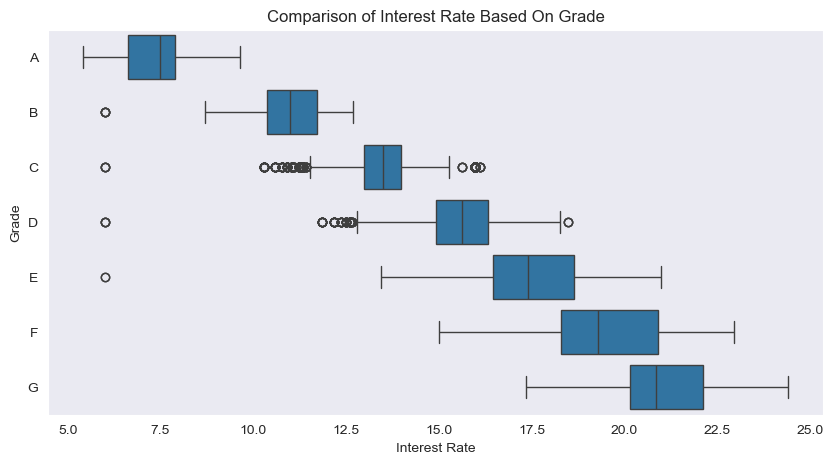

In [749]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

In [750]:
# Inference: The Grade represent risk factor thus we can say interst rate increases with the risk.

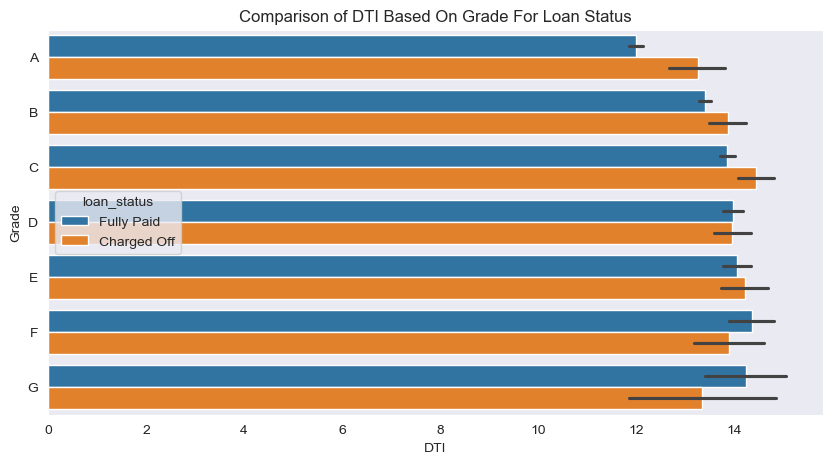

In [751]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

In [752]:
# Inference: The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

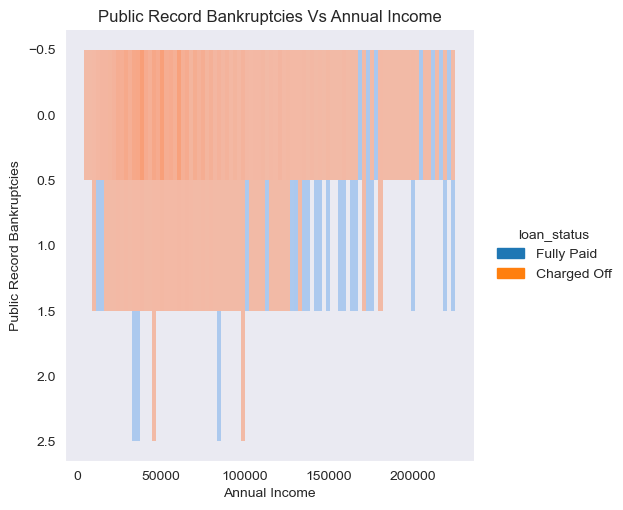

In [753]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_df.pub_rec_bankruptcies.astype('category'),x=loan_df.annual_inc,hue=loan_df.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

In [754]:
# Inference: The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

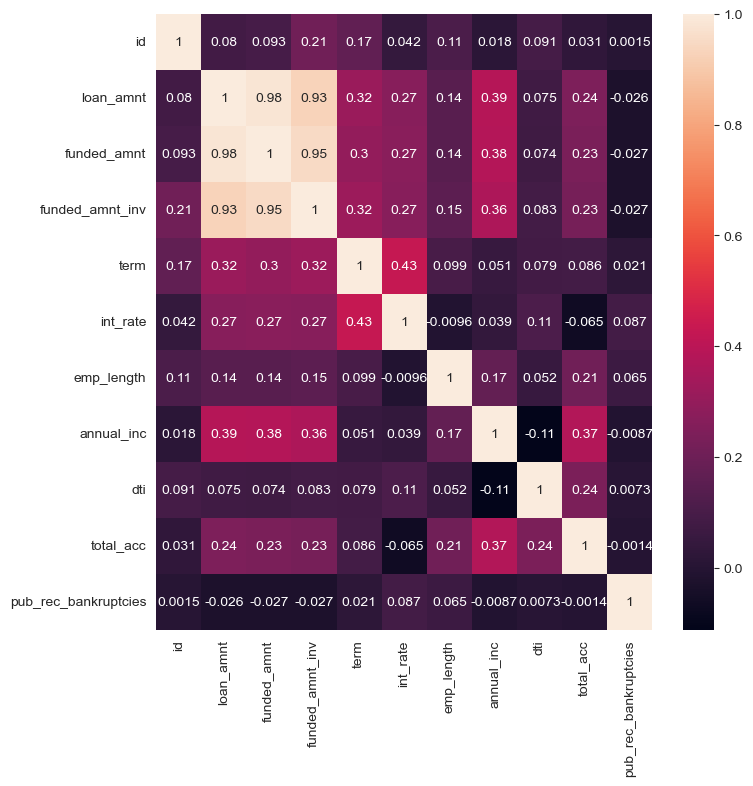

In [755]:
# Heatmap of correlation between variables
corr = loan_df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

In [756]:
# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.